In [1]:
from PIL import Image
from glob import glob
import torchvision.transforms as transforms
import torch
import numpy as np

image_path = glob("./PeopleImages/*")
images = [Image.open(i).convert('RGB') for i in image_path]
transform_dlv3 = transforms.Compose([
        transforms.Resize((513, 513)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
input_tensor_dlv3=torch.stack(([transform_dlv3(i) for i in images]),dim=0)

print(np.asarray(images[0]).shape,input_tensor_dlv3.shape)

(436, 349, 3) torch.Size([10, 3, 513, 513])


In [2]:
import torch
import torchvision

# Load the pre-trained model from PyTorch Hub
def dlv3(input_tensor):
    model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
    with torch.no_grad():
        output = model(input_tensor)['out']
        
    # print(output.shape) 
    mask = output.argmax(1).byte().cpu().numpy()
    # print(mask.shape)
    final_mask=np.zeros(input_tensor.shape)
    for i in range(mask.shape[0]):
        final_mask[i]=np.where(mask[i]==15,input_tensor[i],0)
    return final_mask
mask= dlv3(input_tensor_dlv3)



/home/user/anaconda3/envs/ads/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/anaconda3/envs/ads/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

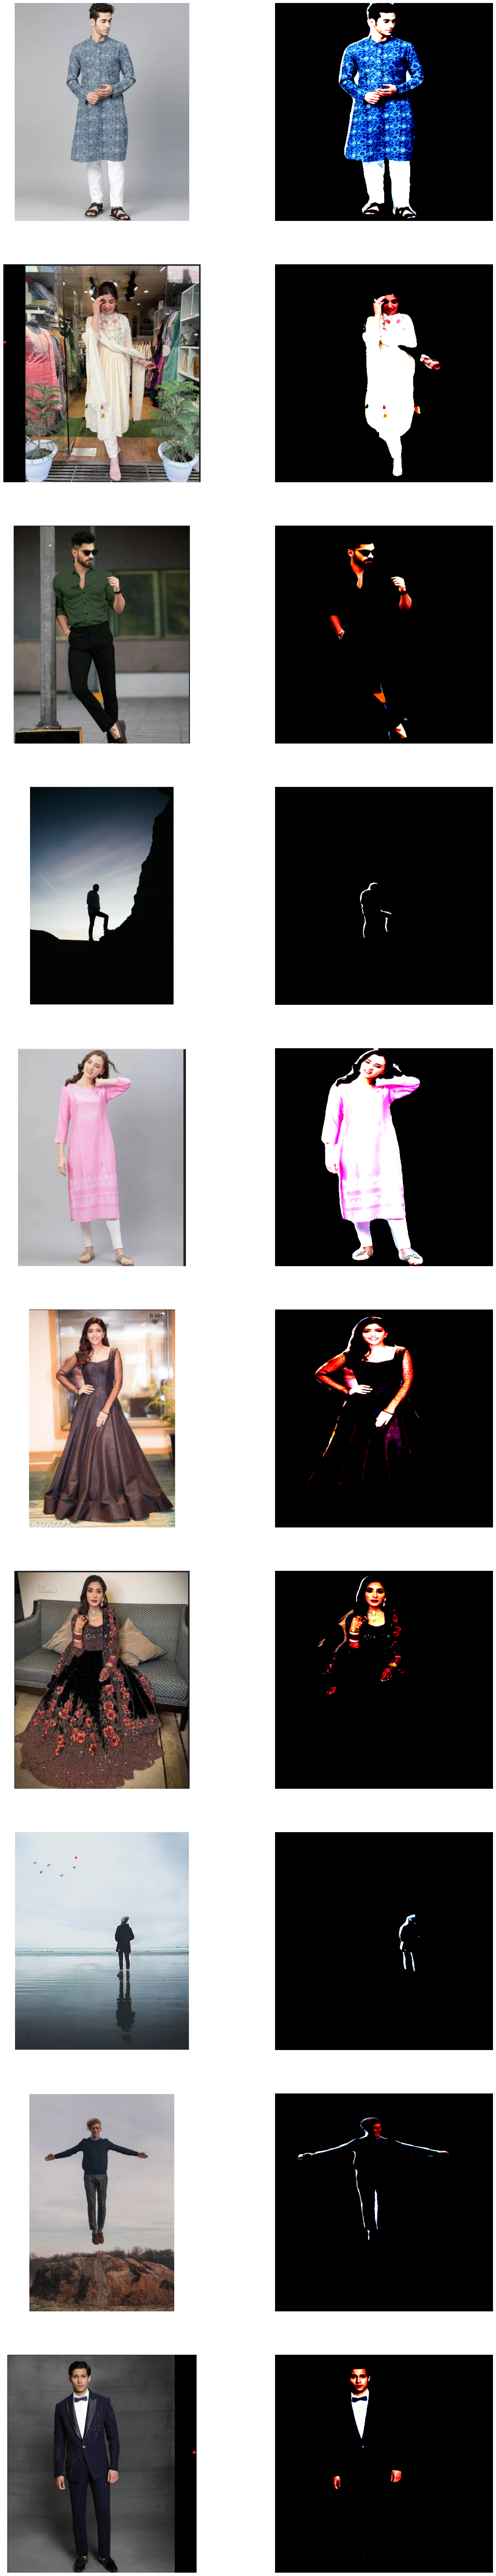

In [3]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(len(images), 2, figsize=(20, 100))
for i  in range(len(images)):
    axes[i,0].imshow(images[i])
    axes[i,0].axis('off')
    axes[i,1].imshow(np.swapaxes(np.swapaxes(mask[i],0,1),1,2),cmap='gray')
    axes[i,1].axis('off')
plt.show()